In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.io import loadmat
from scipy import interpolate
from mpl_toolkits.basemap import Basemap
import netCDF4
from func_pickle import *
import cmocean

%matplotlib inline

In [2]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)
southern_front = np.ma.masked_array(southern_front, mask=False)

W_boundary = 12 # 121,04 degrees
E_boundary = 1560 # 250,04 degrees

look_index = np.where(southern_front[:,W_boundary]==0)[0]
look_index2 = np.where(southern_front[:,E_boundary]==0)[0]
tmp = np.ones(look_index[0])*W_boundary
tmp2 = np.ones(look_index2[0])*E_boundary

### MODEL

In [3]:
# Load files for model
load_path2 = '/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Salt.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Salt.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Salt.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Salt.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Salt.nc','r')

In [4]:
# On selectionne la taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

yc        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
xc        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
print xc[0], xc[-1], yc[0], yc[-1]
XC, YC    = np.meshgrid(xc, yc)

120.041664124 270.041656494 -77.9913330078 -40.0558166504


### CLIMATOLOGY

In [5]:
# Load files from climatology
load_path = '/project_shared/WAGHC/'
file1 = netCDF4.Dataset(load_path+'WAGHC_PYC_01_UHAM-ICDC_v1_0.nc', 'r')
file2 = netCDF4.Dataset(load_path+'WAGHC_PYC_02_UHAM-ICDC_v1_0.nc', 'r')
file3 = netCDF4.Dataset(load_path+'WAGHC_PYC_03_UHAM-ICDC_v1_0.nc', 'r')
file4 = netCDF4.Dataset(load_path+'WAGHC_PYC_04_UHAM-ICDC_v1_0.nc', 'r')
file5 = netCDF4.Dataset(load_path+'WAGHC_PYC_05_UHAM-ICDC_v1_0.nc', 'r')
file6 = netCDF4.Dataset(load_path+'WAGHC_PYC_06_UHAM-ICDC_v1_0.nc', 'r')
file7 = netCDF4.Dataset(load_path+'WAGHC_PYC_07_UHAM-ICDC_v1_0.nc', 'r')
file8 = netCDF4.Dataset(load_path+'WAGHC_PYC_08_UHAM-ICDC_v1_0.nc', 'r')
file9 = netCDF4.Dataset(load_path+'WAGHC_PYC_09_UHAM-ICDC_v1_0.nc', 'r')
file10 = netCDF4.Dataset(load_path+'WAGHC_PYC_10_UHAM-ICDC_v1_0.nc', 'r')
file11 = netCDF4.Dataset(load_path+'WAGHC_PYC_11_UHAM-ICDC_v1_0.nc', 'r')
file12 = netCDF4.Dataset(load_path+'WAGHC_PYC_12_UHAM-ICDC_v1_0.nc', 'r')

In [6]:
lon = file1.variables['longitude'][:]
lat = file1.variables['latitude'][:161]
depth = file1.variables['depth'][:]
Lat, Depth = np.meshgrid(lat, depth)

In [7]:
lon[0], lon[-1], lat[0], lat[-1]

(-180.0, 179.75, -80.0, -40.0)

In [8]:
lon_new = lon + 180

In [9]:
lon_new[480], lon_new[1080]

(120.0, 270.0)

In [10]:
lon_new = lon_new[480:1081]

In [11]:
lon_new[0], lon_new[-1]

(120.0, 270.0)

In [12]:
LON_new, LAT = np.meshgrid(lon_new, lat)

In [13]:
lon_new[0], lon_new[-1], lat[0], lat[-1]

(120.0, 270.0, -80.0, -40.0)

In [14]:
depth[9], depth[17]

(50.0, 258.0)

### Load variables to plot maps

In [15]:
mean_Salt_50 = pickle_load('mean_Salt_50_2', '/data/ebent/Bigger_domain/')
mean_Salt_255 = pickle_load('mean_Salt_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_255_2.npy')


In [16]:
mean_Salt_FEB_50 = pickle_load('mean_Salt_FEB_50_2', '/data/ebent/Bigger_domain/')
mean_Salt_FEB_255 = pickle_load('mean_Salt_FEB_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_FEB_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_FEB_255_2.npy')


In [17]:
clim_Salt_50 = pickle_load('clim_Salt_50_2',  '/data/ebent/Bigger_domain/')
clim_Salt_255 = pickle_load('clim_Salt_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_255_2.npy')


In [18]:
clim_Salt_FEB_50 = pickle_load('clim_Salt_FEB_50_2', '/data/ebent/Bigger_domain/')
clim_Salt_FEB_255 = pickle_load('clim_Salt_FEB_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_FEB_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_FEB_255_2.npy')


In [19]:
mean_Salt_50_interp = interpolate.interp2d(xc, yc, mean_Salt_50, kind='linear')(lon_new, lat)

In [20]:
mean_Salt_255_interp = interpolate.interp2d(xc, yc, mean_Salt_255, kind='linear')(lon_new, lat)

In [21]:
diff_50 = clim_Salt_50 - mean_Salt_50_interp

In [22]:
diff_255 = clim_Salt_255 - mean_Salt_255_interp

***

# Calc S at 50m and 255m

### MODEL

In [28]:
mean_Salt_50 = (np.ma.mean(file1.variables['Salt'][19:,14,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [29]:
pickle_save('mean_Salt_50_2', '/data/ebent/Bigger_domain/', mean_Salt_50)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_50_2.npy')


In [8]:
mean_Salt_255 = (np.ma.mean(file1.variables['Salt'][19:,44,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [10]:
pickle_save('mean_Salt_255_2', '/data/ebent/Bigger_domain/', mean_Salt_255)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_255_2.npy')


### Mean salinity just in February

In [14]:
index_FEB = np.arange(6,12)

In [18]:
mean_Salt_FEB_50 = (np.ma.mean(file2.variables['Salt'][index_FEB,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][index_FEB,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][index_FEB,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][index_FEB,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][index_FEB,14,lat_min:lat_max, lon_min:lon_max], axis=0))/5

In [19]:
pickle_save('mean_Salt_FEB_50_2', '/data/ebent/Bigger_domain/', mean_Salt_FEB_50)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_FEB_50_2.npy')


In [20]:
mean_Salt_FEB_255 = (np.ma.mean(file2.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0))/5

In [21]:
pickle_save('mean_Salt_FEB_255_2', '/data/ebent/Bigger_domain/', mean_Salt_FEB_255)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_FEB_255_2.npy')


In [91]:
mean_Salt_FEB_0 = (np.ma.mean(file2.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][index_FEB,44,lat_min:lat_max, lon_min:lon_max], axis=0))/5

### CLIMATOLOGY

In [16]:
def annual_mean(field, depth):
    T1   = file1.variables[field][:,depth,:161,:]
    T2   = file2.variables[field][:,depth,:161,:]
    T3   = file3.variables[field][:,depth,:161,:]
    T4   = file4.variables[field][:,depth,:161,:]
    T5   = file5.variables[field][:,depth,:161,:]
    T6   = file6.variables[field][:,depth,:161,:]
    T7   = file7.variables[field][:,depth,:161,:]
    T8   = file8.variables[field][:,depth,:161,:]
    T9   = file9.variables[field][:,depth,:161,:]
    T10 = file10.variables[field][:,depth,:161,:]
    T11 = file11.variables[field][:,depth,:161,:]
    T12 = file12.variables[field][:,depth,:161,:]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12

    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat[:161]), len(lon)))

    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]
    
    return T_new[:,480:1081] # to have the exact right domain : [80S, 40S, 120E, 270E]

In [17]:
clim_Salt_50 = annual_mean(field='salinity', depth=9)

In [20]:
pickle_save('clim_Salt_50_2', '/data/ebent/Bigger_domain/', clim_Salt_50)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_50_2.npy')


In [21]:
clim_Salt_255 = annual_mean(field='salinity', depth=17)

In [22]:
pickle_save('clim_Salt_255_2', '/data/ebent/Bigger_domain/', clim_Salt_255)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_255_2.npy')


### Mean salinity just in February

In [ ]:
T2 = file2.variables['salinity'][:,9,:161,:]
T2 = np.squeeze(T2)

# Change lons from -180-180 to 0-360
T2_new = np.ma.masked_all((len(lat[:161]), len(lon)))

for i in range(720):
    T2_new[:,i]=T2[:,i+720]
    
for i in range(720):
    T2_new[:,i+720]=T2[:,i]

In [45]:
clim_Salt_FEB_50 = T2_new[:,480:1081] # to have the exact right domain : [80S, 40S, 120E, 270E]

In [46]:
pickle_save('clim_Salt_FEB_50_2', '/data/ebent/Bigger_domain/', clim_Salt_FEB_50)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_FEB_50_2.npy')


In [47]:
T2 = file2.variables['salinity'][:,17,:161,:]
T2 = np.squeeze(T2)

# Change lons from -180-180 to 0-360
T2_new = np.ma.masked_all((len(lat[:161]), len(lon)))

for i in range(720):
    T2_new[:,i]=T2[:,i+720]
    
for i in range(720):
    T2_new[:,i+720]=T2[:,i]

In [48]:
clim_Salt_FEB_255 = T2_new[:,480:1081] # to have the exact right domain : [80S, 40S, 120E, 270E]

In [49]:
pickle_save('clim_Salt_FEB_255_2', '/data/ebent/Bigger_domain/', clim_Salt_FEB_255)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_FEB_255_2.npy')


In [84]:
T2 = file2.variables['salinity'][:,0,:161,:]
T2 = np.squeeze(T2)

# Change lons from -180-180 to 0-360
T2_new = np.ma.masked_all((len(lat[:161]), len(lon)))

for i in range(720):
    T2_new[:,i]=T2[:,i+720]
    
for i in range(720):
    T2_new[:,i+720]=T2[:,i]

In [85]:
clim_Salt_FEB_0 = T2_new[:,480:1081] # to have the exact right domain : [80S, 40S, 120E, 270E]

***

# Plot maps

In [23]:
def plot_fig2(X, Y, data, cbar_levels, cmap, left, bottom, if_title=False, title=None, if_cbar=False, title_colorbar=None, if_ylabel=False, ylabel=None, save=False, title_save=None):
    print 'min :', data.min(), 'max :', data.max()
    fig     = plt.figure(figsize=(12,3.2))
    m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    
    if if_title==True:
        plt.title(title, fontsize=22, y=1.02)    

    xm, ym  = m(X, Y)
    im      = m.contourf(xm, ym, data, levels=cbar_levels, extend='both', cmap=cmap)
    
    if if_cbar==True:
        cbar = m.colorbar(im, pad='2%', size='3%')
        levels  = cbar_levels
        bounds = [round(levels[i], 2) for i in range(len(levels))]
        cbar.ax.set_yticklabels(bounds[::5]) # select every 5 as bounds has 50 values but colorbar ticks only 10
        cbar.set_label(title_colorbar, fontsize=20, labelpad=10)
        
    if cmap==cmocean.cm.dense:   
        cbar = m.colorbar(im, pad='2%', size='3%', ticks=[-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
        bounds = ['-0.7', '-0.6', '-0.5', '-0.4', '-0.3','-0.2','-0.1','0','0.1','0.2','0.3', '0.4', '0.5', '0.6','0.7']
        cbar.ax.set_yticklabels(bounds)
        cbar.set_label(title_colorbar, fontsize=20, labelpad=10)
        
    #levels  = cbar_levels
    #bounds = [round(levels[i], 2) for i in range(len(levels))]
    #cbar.ax.set_yticklabels(bounds)
    if if_ylabel==True:
        plt.ylabel(ylabel, labelpad=30, fontsize=20)
    
    m.fillcontinents(color='k', lake_color='k')
    m.drawparallels(np.arange(-80.,-20.,10), labels=[left, 0, 0, 0], labelstyle='+/-')
    m.drawmeridians(np.arange(140.,301.,40), labels=[0, 0, 0, bottom], labelstyle='+/-')
    m.drawcoastlines()
    
    # Plot the southern front
    xm, ym  = m(XC[:,W_boundary:E_boundary], YC[:,W_boundary:E_boundary])
    im      = m.contour(xm, ym, southern_front[:,W_boundary:E_boundary], colors='dodgerblue', linewidths=2)
    
    # Plot the E_boundary and W_boundary
    xm, ym  = m(XC[:660,W_boundary], YC[:look_index[0],0])
    m.plot(xm, ym, '-', color='dodgerblue', linewidth=2)
    
    xm, ym  = m(XC[:557,E_boundary], YC[:look_index2[0],0])
    m.plot(xm, ym, '-', color='dodgerblue', linewidth=2)
    
    
    if save == True:
        plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight', dpi=300)
    #plt.show()
    #return m, im

### All year mean - Colorbar a little bit saturated

min : 32.6182127643 max : 35.3682223086


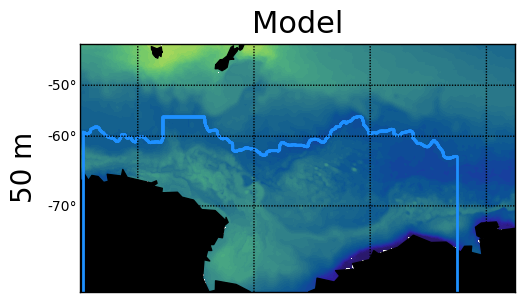

In [24]:
plot_fig2(XC, YC, mean_Salt_50, cbar_levels=np.linspace(33,35.76,50), cmap=cmocean.cm.haline, \
          left=1, bottom=0, \
          if_title=True, title='Model', \
          if_ylabel=True, ylabel='50 m',\
          save=True, title_save='model_S_50m.png')

min : 33.7204971313 max : 35.5579566956


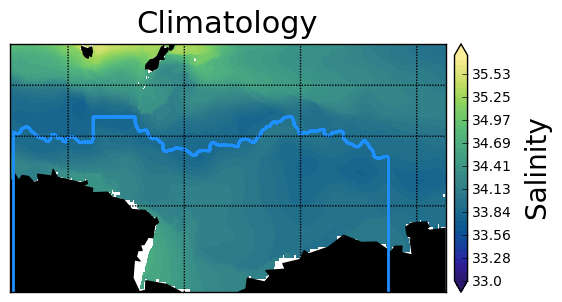

In [25]:
plot_fig2(LON_new, LAT, clim_Salt_50, cbar_levels=np.linspace(33,35.76,50), cmap=cmocean.cm.haline, \
          left=0, bottom=0, \
          if_title=True, title='Climatology', if_cbar=True, title_colorbar='Salinity ', \
          save=True, title_save='data_S_50m.png')

min : 34.0711880829 max : 35.2424938195


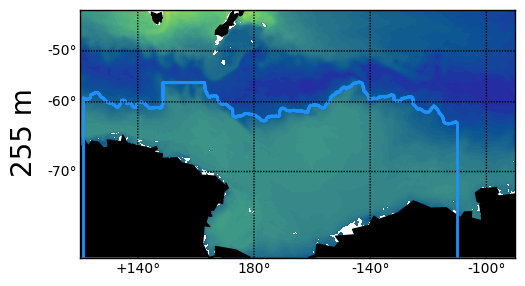

In [26]:
plot_fig2(XC, YC, mean_Salt_255, cbar_levels=np.linspace(33.92,35.50,50), cmap=cmocean.cm.haline, \
          left=1, bottom=1, \
          if_ylabel=True, ylabel='255 m',
          save=True, title_save='model_S_255m.png')

min : 34.0146980286 max : 35.1826553345


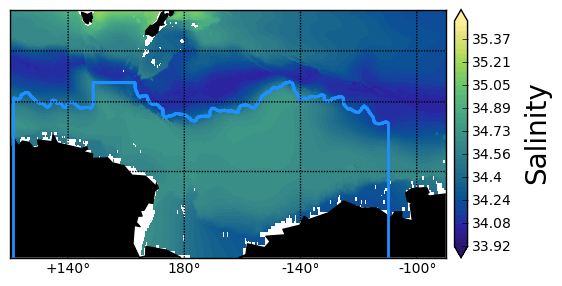

In [27]:
plot_fig2(LON_new, LAT, clim_Salt_255, cbar_levels=np.linspace(33.92,35.50,50), cmap=cmocean.cm.haline, \
          left=0, bottom=1, \
          if_cbar=True, title_colorbar='Salinity', \
          save=True, title_save='data_S_255m.png')

***

### February mean

min : 32.0036142985 max : 35.3817160288


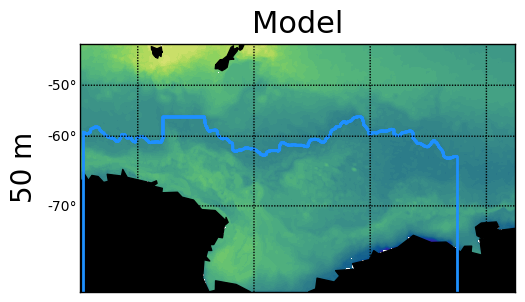

In [28]:
plot_fig2(XC, YC, mean_Salt_FEB_50, cbar_levels=np.linspace(32,35.65,50), cmap=cmocean.cm.haline, \
          left=1, bottom=0, \
          if_title=True, title='Model', \
          if_ylabel=True, ylabel='50 m',\
          save=True, title_save='FEB_model_S_50m.png')

min : 33.6124000549 max : 35.643699646


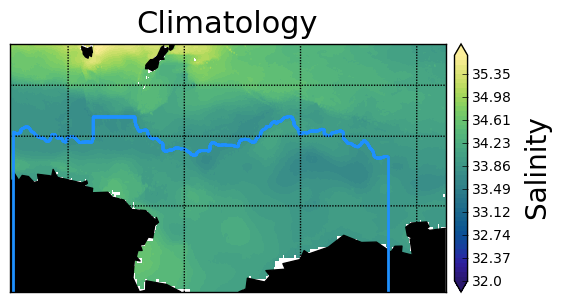

In [29]:
plot_fig2(LON_new, LAT, clim_Salt_FEB_50, cbar_levels=np.linspace(32,35.65,50), cmap=cmocean.cm.haline, \
          left=0, bottom=0, \
          if_title=True, title='Climatology', if_cbar=True, title_colorbar='Salinity ', \
          save=True, title_save='FEB_data_S_50m.png')

min : 34.0451039632 max : 35.3035007477


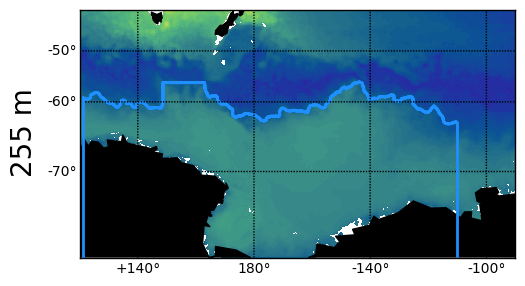

In [30]:
plot_fig2(XC, YC, mean_Salt_FEB_255, cbar_levels=np.linspace(33.92,35.50,50), cmap=cmocean.cm.haline, \
          left=1, bottom=1, \
          if_ylabel=True, ylabel='255 m',
          save=True, title_save='FEB_model_S_255m.png')

min : 33.9940986633 max : 35.2108001709


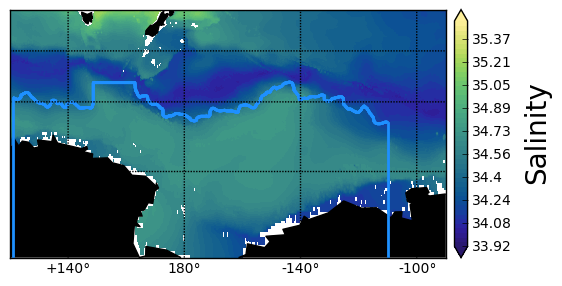

In [31]:
plot_fig2(LON_new, LAT, clim_Salt_FEB_255, cbar_levels=np.linspace(33.92,35.50,50), cmap=cmocean.cm.haline, \
          left=0, bottom=1, \
          if_cbar=True, title_colorbar='Salinity', \
          save=True, title_save='FEB_data_S_255m.png')

***

# Difference

In [44]:
def plot_diff(X, Y, data, cbar_levels, cmap, left, bottom, if_title=False, title=None, if_cbar=False, title_colorbar=None, if_ylabel=False, ylabel=None, save=False, title_save=None):
    print 'min :', data.min(), 'max :', data.max()
    fig     = plt.figure(figsize=(12,3.2))
    m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    
    if if_title==True:
        plt.title(title, fontsize=22, y=1.02)    

    xm, ym  = m(X, Y)
    im      = m.contourf(xm, ym, data, levels=cbar_levels, extend='both', cmap=cmap)
    
    if if_cbar==True: 
        cbar = m.colorbar(im, pad='2%', size='3%', ticks=[-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
        bounds = ['-0.7', '-0.6', '-0.5', '-0.4', '-0.3','-0.2','-0.1','0','0.1','0.2','0.3', '0.4', '0.5', '0.6','0.7']
        cbar.ax.set_yticklabels(bounds)
        cbar.set_label(title_colorbar, fontsize=20, labelpad=15)
        
    #levels  = cbar_levels
    #bounds = [round(levels[i], 2) for i in range(len(levels))]
    #cbar.ax.set_yticklabels(bounds)
    if if_ylabel==True:
        plt.ylabel(ylabel, labelpad=30, fontsize=20)
    
    m.fillcontinents(color='k', lake_color='k')
    m.drawparallels(np.arange(-80.,-20.,10), labels=[left, 0, 0, 0], labelstyle='+/-')
    m.drawmeridians(np.arange(140.,301.,40), labels=[0, 0, 0, bottom], labelstyle='+/-')
    m.drawcoastlines()
    
    
    # Plot the southern front
    xm, ym  = m(XC[:,W_boundary:E_boundary], YC[:,W_boundary:E_boundary])
    im      = m.contour(xm, ym, southern_front[:,W_boundary:E_boundary], colors='b', linewidths=2)
    
    # Plot the E_boundary and W_boundary
    xm, ym  = m(XC[:660,W_boundary], YC[:look_index[0],0])
    m.plot(xm, ym, '-', color='b', linewidth=2)
    
    xm, ym  = m(XC[:557,E_boundary], YC[:look_index2[0],0])
    m.plot(xm, ym, '-', color='b', linewidth=2)
    
    
    if save == True:
        plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight', dpi=300)
    #plt.show()
    #return m, im

min : -0.384832013361 max : 35.1944999695


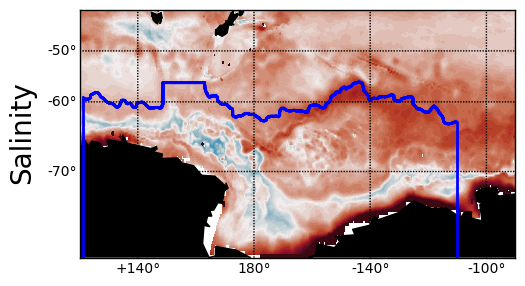

In [45]:
plot_diff(LON_new, LAT, diff_50, cbar_levels=np.linspace(-0.7,0.7,50), cmap=cmocean.cm.balance, \
          left=1, bottom=1, \
          if_ylabel=True, ylabel='Salinity',
          save=True, title_save='diff_S_50m.png')

min : -0.421353557389 max : 34.7346687317


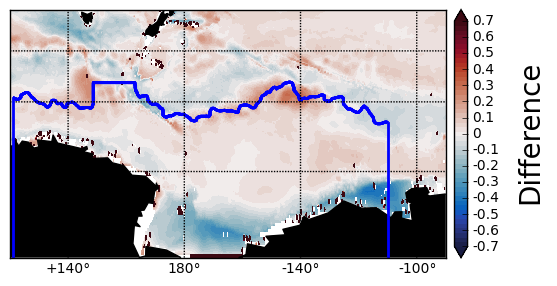

In [46]:
plot_diff(LON_new, LAT, diff_255, cbar_levels=np.linspace(-0.7,0.7,50), cmap=cmocean.cm.balance, \
          left=0, bottom=1, \
          if_cbar=True, title_colorbar='Difference', \
          save=True, title_save='diff_S_255m.png')

### Salinity for model for figure with differences and one field of salinity

min : 32.6182127643 max : 35.3682223086


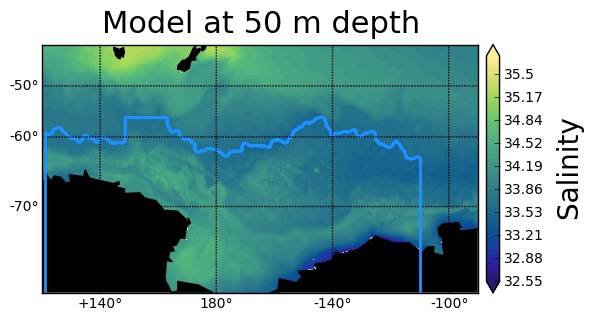

In [43]:
plot_fig2(XC, YC, mean_Salt_50, cbar_levels=np.linspace(32.55,35.76,50), cmap=cmocean.cm.haline, \
          left=1, bottom=1, \
          if_title=True, title='Model at 50 m depth', if_cbar=True, title_colorbar='Salinity ', \
          save=True, title_save='new_model_S_50m.png')

## Gradient plots

In [40]:
from netCDF4 import Dataset

In [119]:
def grad_diff(lat_n, lon_n, mean_Field, ind, title, title_save):
    
    plt.figure(figsize=(4,4))
    
    lon = lon_n*4+720
    LAT = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,LAT,lon]
    T2   = file2.variables['salinity'][:,:,LAT,lon]
    T3   = file3.variables['salinity'][:,:,LAT,lon]
    T4   = file4.variables['salinity'][:,:,LAT,lon]
    T5   = file5.variables['salinity'][:,:,LAT,lon]
    T6   = file6.variables['salinity'][:,:,LAT,lon]
    T7   = file7.variables['salinity'][:,:,LAT,lon]
    T8   = file8.variables['salinity'][:,:,LAT,lon]
    T9   = file9.variables['salinity'][:,:,LAT,lon]
    T10 = file10.variables['salinity'][:,:,LAT,lon]
    T11 = file11.variables['salinity'][:,:,LAT,lon]
    T12 = file12.variables['salinity'][:,:,LAT,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    mean_Field = pickle_load(mean_Field, '/data/ebent', verbose=False)
    mean_Field = mean_Field[:,ind]
    minimum = mean_Field.min()
    nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
    z = nc.variables['depth'][:]
    mean_Field=mean_Field[::-1]
    z=z[::-1]
    mean_Field = interpolate.interp1d(z, mean_Field, bounds_error=False)(depth)
    mean_Field = np.ma.masked_where(mean_Field==0., mean_Field)
    mean_Field = np.ma.masked_where(np.isnan(mean_Field), mean_Field)
    mean_Field = np.ma.masked_where(mean_Field<minimum, mean_Field)
    mean_Field = np.ma.masked_where(T.mask==True, mean_Field)
    T = np.ma.masked_where(mean_Field.mask==True, T)

    diff = T-mean_Field
    
    plt.plot(diff, depth, linewidth=2, color='r')
    plt.title(title, fontsize=22)#, loc='left')
    plt.xlabel('Difference', fontsize=20)
    #plt.ylabel('Depth [m]', fontsize=20)
    plt.gca().invert_yaxis() #gca : get current axis
    plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight', dpi=300)

In [120]:
nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
z = nc.variables['depth'][:]

def grad_both(field, lat, lat_title, lon_title, T_or_S, t_or_s, lat_n, lon_n, title, title_save):
    
    plt.figure(figsize=(4,4))
    
    #model
    field = pickle_load(field, '/data/ebent', verbose=False)
    field=field[:,lat]
    minimum = field.min()
    
    #climatology
    lon = lon_n*4+720
    lat = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,lat,lon]
    T2   = file2.variables['salinity'][:,:,lat,lon]
    T3   = file3.variables['salinity'][:,:,lat,lon]
    T4   = file4.variables['salinity'][:,:,lat,lon]
    T5   = file5.variables['salinity'][:,:,lat,lon]
    T6   = file6.variables['salinity'][:,:,lat,lon]
    T7   = file7.variables['salinity'][:,:,lat,lon]
    T8   = file8.variables['salinity'][:,:,lat,lon]
    T9   = file9.variables['salinity'][:,:,lat,lon]
    T10 = file10.variables['salinity'][:,:,lat,lon]
    T11 = file11.variables['salinity'][:,:,lat,lon]
    T12 = file12.variables['salinity'][:,:,lat,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    field = interpolate.interp1d(z, field, bounds_error=False)(depth)
    field = np.ma.masked_where(field==0., field)
    field = np.ma.masked_where(np.isnan(field), field)
    field = np.ma.masked_where(field<minimum, field)
    field = np.ma.masked_where(T.mask==True, field)
    T = np.ma.masked_where(field.mask==True, T)
    
    plt.plot(field, depth, label='Model', linewidth=2, color='g')
    plt.plot(T, depth, label='Climatology', linewidth=2, color='b')
    plt.legend(loc='lower left', fontsize=16)
    plt.title(title, fontsize=22)#, loc='left')
    plt.xlabel('Salinity', fontsize=20)
    plt.ylabel('Depth [m]', fontsize=20)
    plt.gca().invert_yaxis()
    plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight', dpi=300)



/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in less


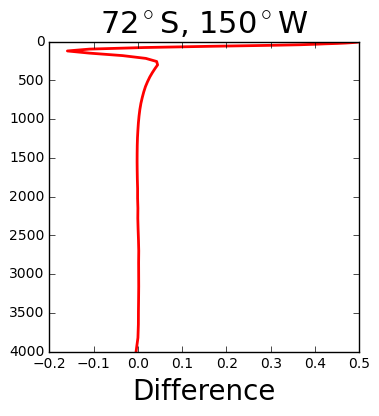

In [127]:
grad_diff(-72, -150, 'mean_Salt_150W', 281, '72$^\circ$S, 150$^\circ$W', 'grad_diff_72.png')

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in less


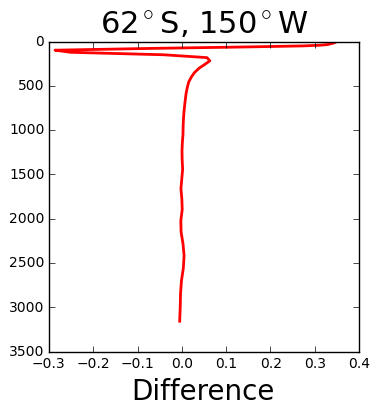

In [128]:
grad_diff(-62, -150, 'mean_Salt_150W', 593, '62$^\circ$S, 150$^\circ$W', 'grad_diff_62.png')

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in less


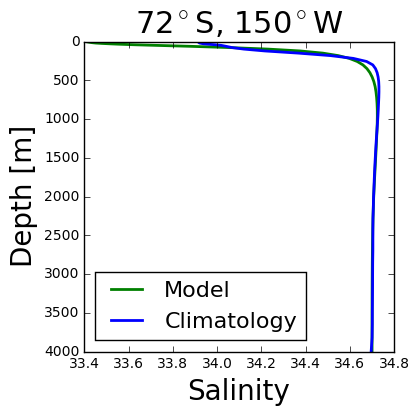

In [129]:
grad_both('mean_Salt_150W', 281, '-40', '-150', 'Salinity', 'Salinity', -72, -150, '72$^\circ$S, 150$^\circ$W', 'grad_72.png')

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in less


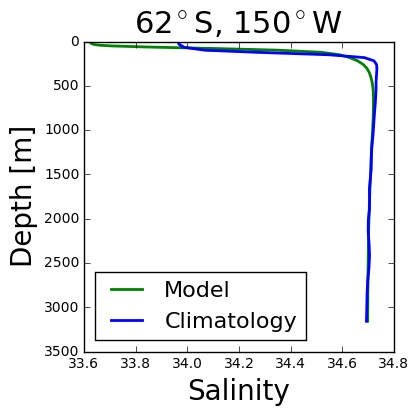

In [130]:
grad_both('mean_Salt_150W', 593, '-40', '-150', 'Salinity', 'Salinity', -62, -150, '62$^\circ$S, 150$^\circ$W', 'grad_62.png')